<a href="https://colab.research.google.com/github/levutb2004/deep_learning_uet/blob/main/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [ ]:
data_path = "/content/Train_data.txt"

In [ ]:
data = []
with open(data_path, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(line.strip())

df = pd.DataFrame(data, columns=['text'])

df['label'] = df['text'].apply(lambda x: x.split(' ')[0].replace('__label__', ''))
df['text'] = df['text'].apply(lambda x: ' '.join(x.split(' ')[1:]))

df

,text,label
0,"Theo hành trình tour du lịch Mỹ - Bờ Đông, du ...",Du_lich
1,mình cần tìm 1 phòng cho khoảng 3 người quanh...,Nha_dat
2,Cho thuê nhà riêng dt 60m/sàn. Có 4 phòng ngủ...,Nha_dat
3,"Cho thuê nhà ở tầng 4 khép kín, 4/295 Nguyễn K...",Nha_dat
4,► Crumpler jackpack full photo ► giá : 800.000...,Mua_sam
...,...,...
15995,CÁC MÓN KIM CHI NGON CHO MÙA THU -------------...,Do_an_va_do_uong
15996,Cần cho thuê Chung cư Greenstar 234 Phạm Văn Đ...,Nha_dat
15997,CHƯƠNG TRÌNH HỌC PHÍ THÁNG 08/2016 TẶNG NGAY ...,Kinh_doanh_va_Cong_nghiep
15998,Bố trí thông minh giúp nhà ống Sài Gòn không c...,Nha_va_vuon


**Ta có thể thấy bộ dữ liệu gồm có 16000 bài viết với nhiều chủ đề khác nhau**

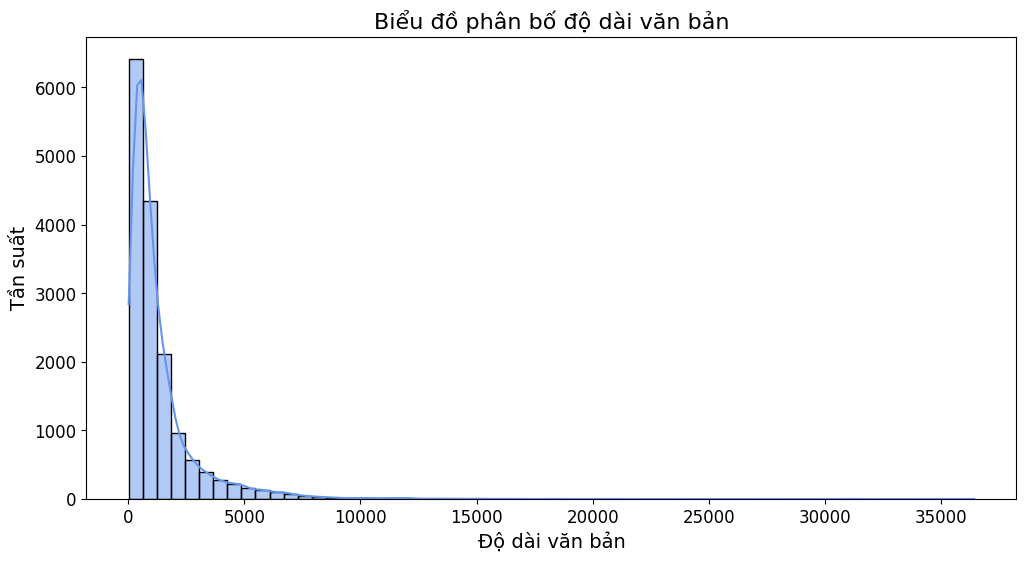

In [ ]:
# Tính toán độ dài của văn bản
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(12, 6))

# Tạo histogram với cột chia rõ ràng
sns.histplot(df['text_length'], bins=60, color='cornflowerblue', kde=True, edgecolor='black')

# Tùy chỉnh tiêu đề và nhãn
plt.title('Biểu đồ phân bố độ dài văn bản', fontsize=16)
plt.xlabel('Độ dài văn bản', fontsize=14)
plt.ylabel('Tần suất', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Hiển thị biểu đồ
plt.show()


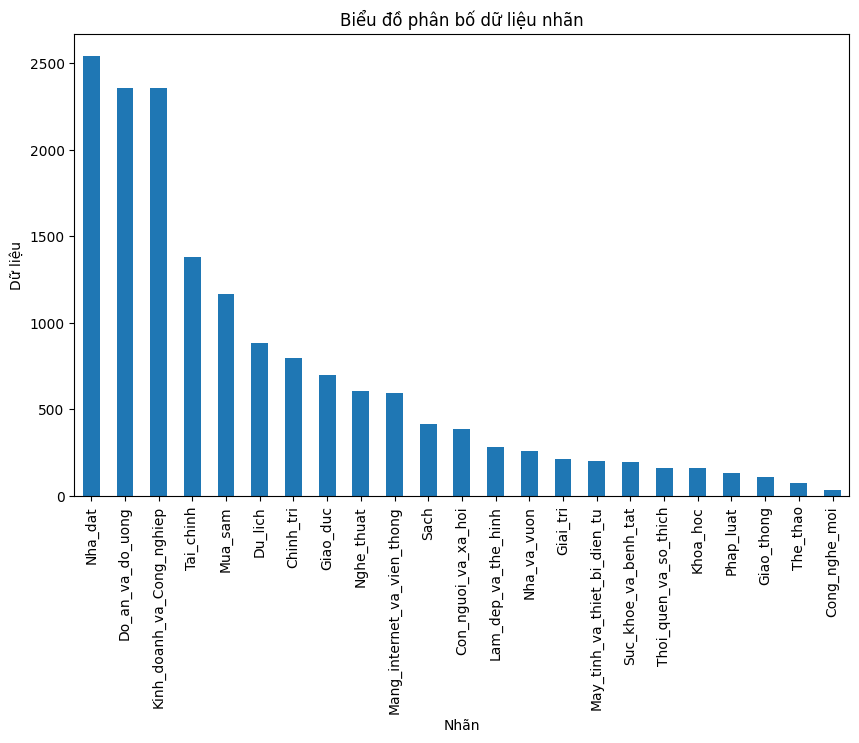

In [ ]:
# Calculate the value counts of the 'label' column
label_counts = df['label'].value_counts()

# Plot the value counts
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Biểu đồ phân bố dữ liệu nhãn')
plt.xlabel('Nhãn')
plt.ylabel('Dữ liệu')
plt.show()

In [ ]:
df[['text', 'label']].describe(include='all')

,text,label
count,16000,16000
unique,15223,23
top,Kế toán của một công ty mới thành lập bạn sẽ p...,Nha_dat
freq,2,2542


**Dữ liệu có vài trăm hàng bị trùng lặp**

In [ ]:
# Đọc danh sách stopwords từ file
stopwords_path = '/content/vietnamese-stopwords.txt'
with open(stopwords_path, 'r', encoding='utf-8') as file:
    vietnamese_stopwords = set(line.strip() for line in file)

In [ ]:
def preprocess_text(text, stopwords):
    # Loại bỏ đường link
    text = re.sub(r'http\S+', '', text)
    # Loại bỏ các ký tự đặc biệt, emojis và số
    text = re.sub(r'[^\w\s]|_', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    # Chuyển về chữ thường
    text = text.lower()

    # Tách từ và loại bỏ stopwords
    words = text.split()
    words = [word for word in words if word not in stopwords]
    return ' '.join(words)

In [ ]:
df['text'] = df['text'].apply(lambda x: preprocess_text(x, vietnamese_stopwords))
df = df.drop_duplicates('text', keep='first').reset_index(drop=True)
df

,text,label,text_length
0,hành trình tour du lịch mỹ bờ đông du lữ hành ...,Du_lich,864
1,phòng quanh khu vực hồ tùng mậu phòng khép kín...,Nha_dat,217
2,thuê dt msàn phòng ngủ p thoáng mát an ninh ng...,Nha_dat,158
3,thuê tầng khép kín nguyễn khoái bếp tủ lạnh lò...,Nha_dat,282
4,crumpler jackpack full photo giá vnđ vnđ đựng ...,Mua_sam,938
...,...,...,...
15044,hành trình nhật ngắm hoa tử đằng nhật hành trì...,Du_lich,1541
15045,món kim chi ngon mùa thu ực ựcựcthật chảy miến...,Do_an_va_do_uong,477
15046,thuê cư greenstar phạm văn đồng bắc liêm hà nộ...,Nha_dat,1103
15047,bố trí thông minh giúp ống sài gòn chỗ tối bố ...,Nha_va_vuon,1945


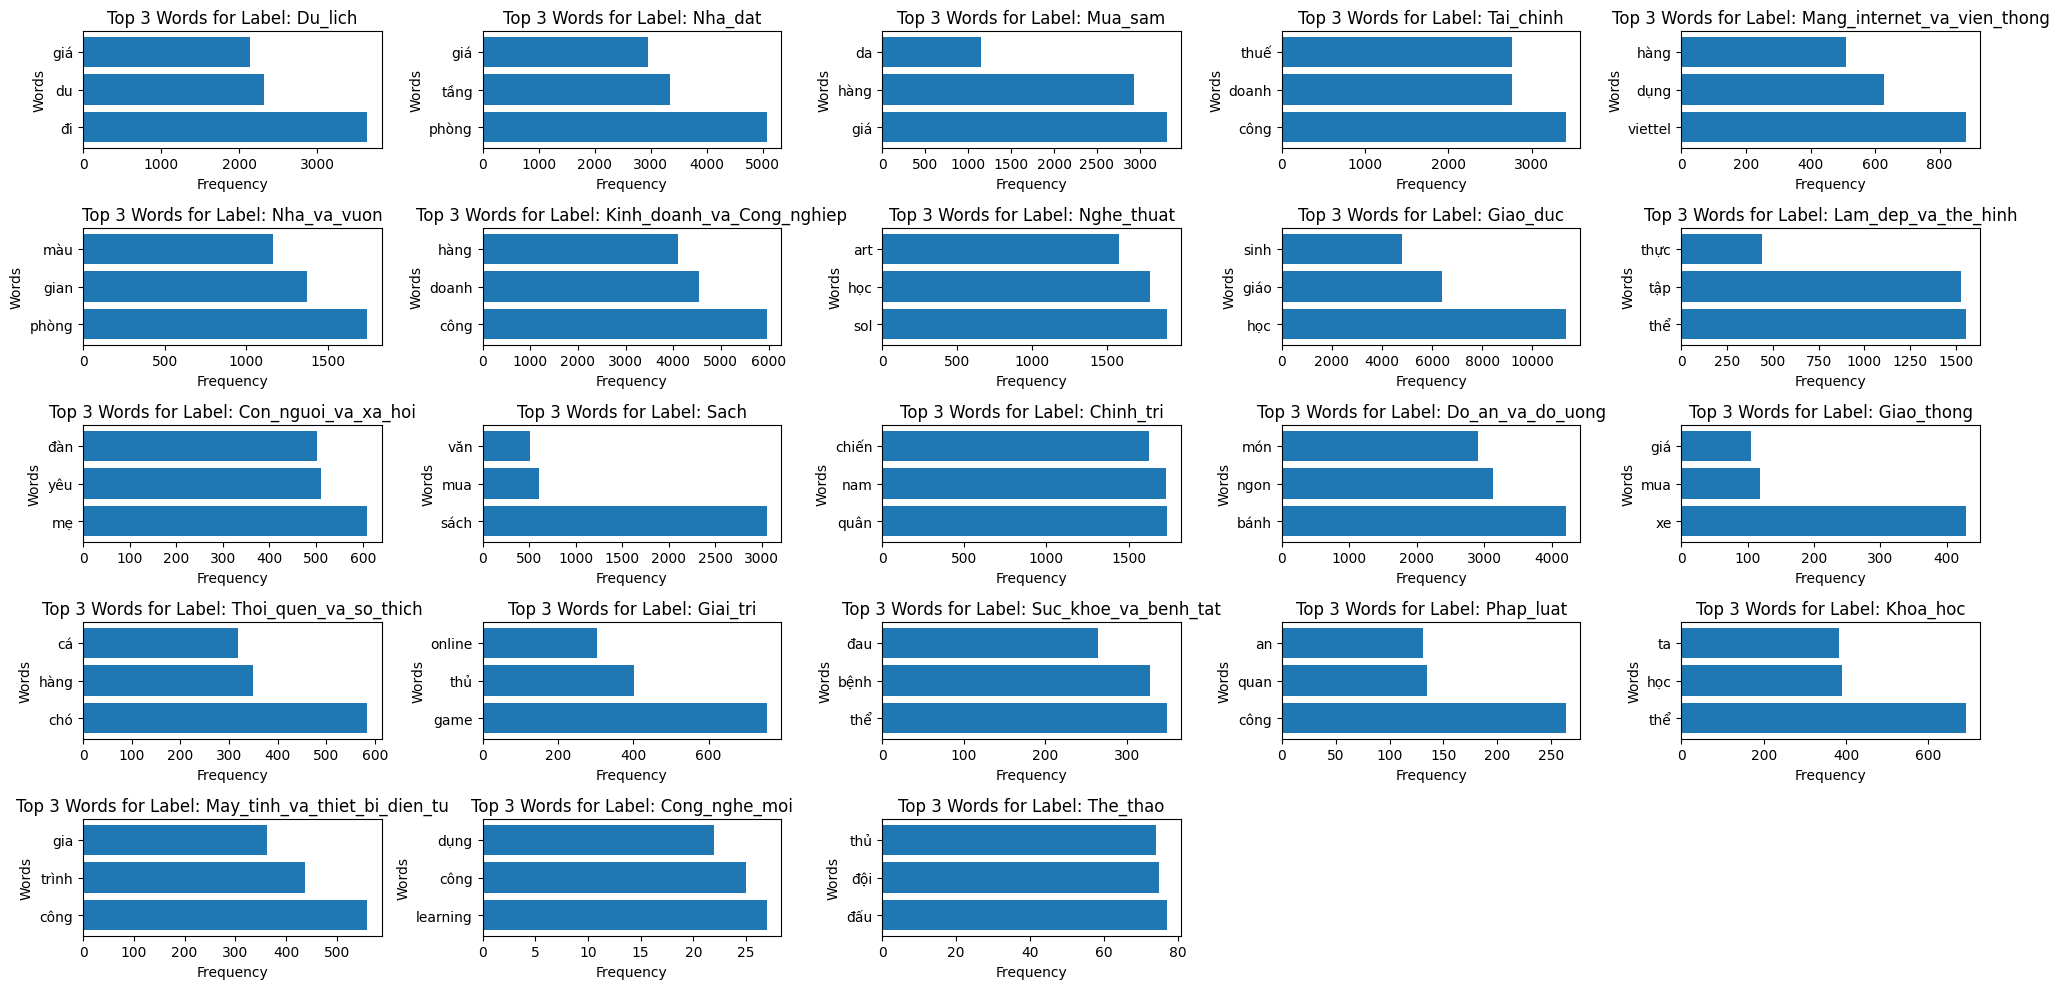

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Khởi tạo CountVectorizer
vectorizer = CountVectorizer()

# Lưu top 5 từ của từng nhãn
top_words_per_label = {}
for label in df['label'].unique():
    # Lọc dữ liệu theo nhãn
    label_texts = df[df['label'] == label]['text']

    # Vector hóa dữ liệu văn bản
    X = vectorizer.fit_transform(label_texts)

    # Tổng tần suất mỗi từ
    word_freq = X.sum(axis=0).A1
    words = vectorizer.get_feature_names_out()

    # Tạo DataFrame chứa từ và tần suất, sau đó sắp xếp giảm dần
    word_freq_df = pd.DataFrame({'word': words, 'frequency': word_freq})
    word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

    # Lưu lại 5 từ phổ biến nhất
    top_words_per_label[label] = word_freq_df.head(3)

# Tạo lưới biểu đồ (grid of subplots)
num_labels = len(top_words_per_label)
rows = (num_labels + 4) // 5  # Số hàng trong grid
fig, axes = plt.subplots(rows, 5, figsize=(20, 2 * rows))
axes = axes.flatten()

for idx, (label, top_words) in enumerate(top_words_per_label.items()):
    ax = axes[idx]
    ax.barh(top_words['word'], top_words['frequency'])
    ax.set_title(f"Top 3 Words for Label: {label}")
    ax.set_xlabel("Frequency")
    ax.set_ylabel("Words")

# Ẩn các ô thừa trong grid
for idx in range(len(top_words_per_label), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


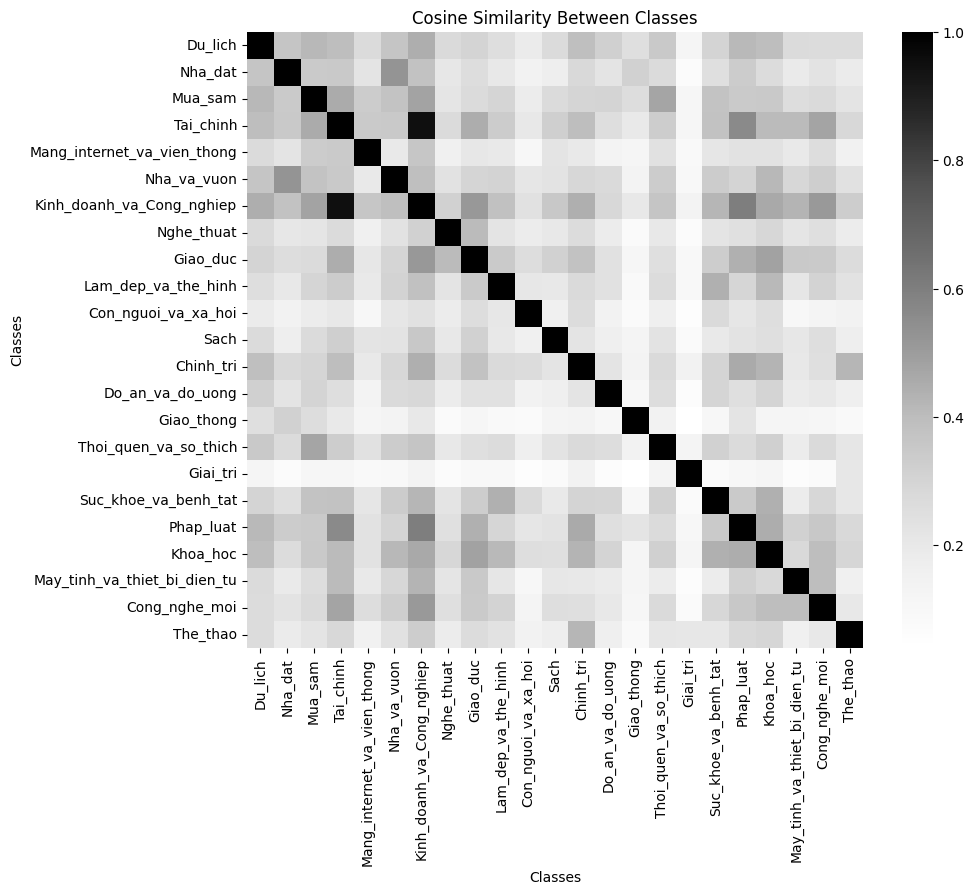

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Tạo TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Giới hạn số lượng đặc trưng để tối ưu

# Biến đổi văn bản thành ma trận TF-IDF
tfidf_matrix = vectorizer.fit_transform(df['text'])

# Tính vector trung bình cho mỗi lớp
class_vectors = {}
for label in df['label'].unique():
    class_texts = df[df['label'] == label]['text']
    class_tfidf = vectorizer.transform(class_texts)
    class_vectors[label] = np.mean(class_tfidf.toarray(), axis=0)

from sklearn.metrics.pairwise import cosine_similarity

# Tạo danh sách các nhãn lớp
labels = list(class_vectors.keys())

# Chuyển class_vectors thành ma trận để tính cosine similarity
class_matrix = np.vstack([class_vectors[label] for label in labels])

# Tính cosine similarity
cosine_sim_matrix = cosine_similarity(class_matrix)


import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ heatmap với colormap "Greys"
plt.figure(figsize=(10, 8))
sns.heatmap(
    cosine_sim_matrix,
    xticklabels=labels,
    yticklabels=labels,
    cmap="Greys",  # Sử dụng colormap Greys
    cbar=True,
    square=True  # Đảm bảo các ô vuông
)
plt.title("Cosine Similarity Between Classes")
plt.xlabel("Classes")
plt.ylabel("Classes")
plt.show()


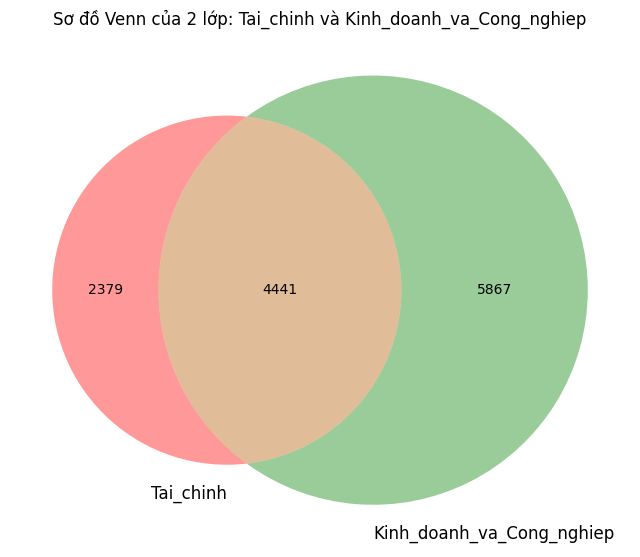

In [ ]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Lấy văn bản của 2 lớp
tai_chinh_texts = df[df['label'] == 'Tai_chinh']['text']
kinh_doanh_texts = df[df['label'] == 'Kinh_doanh_va_Cong_nghiep']['text']

# Tách từ và đưa vào tập hợp (set) để loại bỏ từ trùng lặp
tai_chinh_words = set(" ".join(tai_chinh_texts).split())
kinh_doanh_words = set(" ".join(kinh_doanh_texts).split())

# Vẽ sơ đồ Venn
plt.figure(figsize=(8, 8))
venn = venn2([tai_chinh_words, kinh_doanh_words],
             ('Tai_chinh', 'Kinh_doanh_va_Cong_nghiep'))

# Thêm tiêu đề
plt.title("Sơ đồ Venn của 2 lớp: Tai_chinh và Kinh_doanh_va_Cong_nghiep")

plt.show()